## 三维曲面图

In [1]:
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
mpl.rcParams["font.family"] = 'Arial'  #默认字体类型
mpl.rcParams["mathtext.fontset"] = 'cm' #数学文字字体
mpl.rcParams["contour.negative_linestyle"] = 'dashed'  #默认字体类型
import matplotlib.pyplot as plt
import os
# 新增
from matplotlib.colors import LightSource
from nice import niceAxis,text3d

## 简单例子

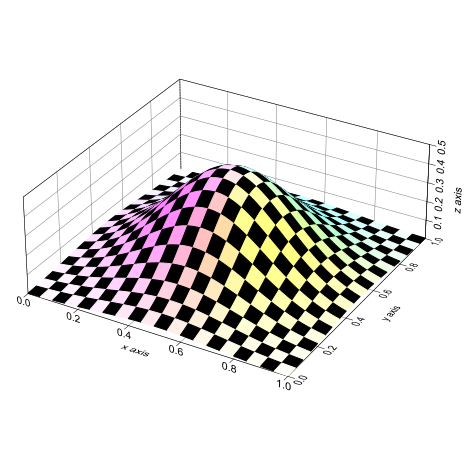

In [7]:
n = 101
X = Y = np.linspace(-1, 1, n)
X,Y = np.meshgrid(X, Y)
R = np.sqrt(5*(X**2+Y**2))
Z = 0.5*np.exp(-0.5*R*R)
X,Y = (1+X)/2, (1+Y)/2

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')

C = np.ones((n,n,3))
I1 = LightSource(azdeg=  0, altdeg=25).hillshade(Z).reshape(n,n,1)
I2 = LightSource(azdeg=120, altdeg=25).hillshade(Z).reshape(n,n,1)
I3 = LightSource(azdeg=240, altdeg=25).hillshade(Z).reshape(n,n,1)
C = 0.5*C + (I1*(1,0,0) + I2*(0,1,0) + I3*(0,0,1))
C = np.minimum(C,(1,1,1))
C[::2,::2] = C[1::2,1::2] = 0.0, 0.0, 0.0

CS=ax.plot_surface(X, Y, Z, facecolors=C,shade=False,rstride=5, cstride=5,edgecolor='None')
# CS=ax.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r,shade=False,rstride=1, cstride=1,edgecolor='None')

ax.set_xlabel('x axis',labelpad=0)
ax.set_ylabel('y axis',labelpad=-5)
ax.set_zlabel('z axis',labelpad=-5)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0.001,0.5)

# 重新自定义坐标轴属性
niceAxis(ax,fill_pane=False,label3D=True,fs_label=0.08)

# savefig
fname_fig=str('../../figures/Chapter4/Lecture4_2_basic1.pdf')
plt.savefig(fname_fig,transparent=True)
os.system('pdfcrop '+fname_fig+' '+fname_fig)
plt.show()

## 实例


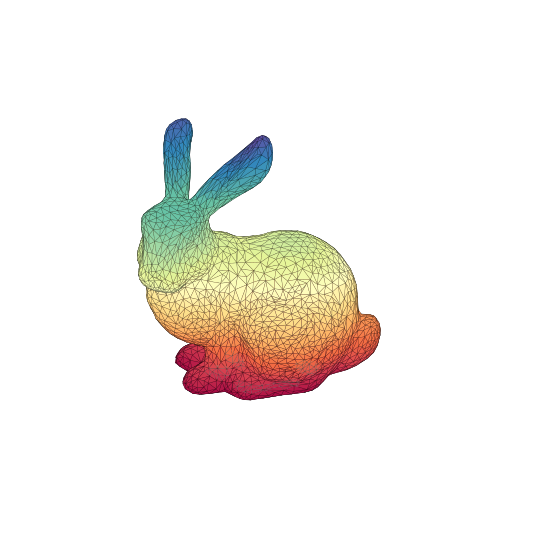

In [6]:
# Wavefront loader (only vertices and faces)
def obj_load(filename):
    V, Vi = [], []
    with open(filename) as f:
        for line in f.readlines():
            if line.startswith('#'): continue
            values = line.split()
            if not values: continue
            if values[0] == 'v':
                V.append([float(x) for x in values[1:4]])
            elif values[0] == 'f' :
                Vi.append([int(x) for x in values[1:4]])
    return np.array(V), np.array(Vi)-1
V, F = obj_load("Data/bunny.obj")


fig = plt.figure(figsize=(10,10))
ax=fig.gca(projection='3d')
ax.plot_trisurf(V[:,0],V[:,2],V[:,1], triangles=F, cmap=plt.cm.Spectral,edgecolor=(0,0,0,0.5),linewidth=0.3)

ax.set_xlabel('x axis',labelpad=0)
ax.set_ylabel('y axis',labelpad=-5)
ax.set_zlabel('z axis',labelpad=-5)
ax.set_xlim(-0.1,0.1)
ax.set_ylim(-0.1,0.1)
ax.set_zlim(0,0.2)
ax.view_init(elev=30, azim=-270)
ax.set_box_aspect((1,1,1))
ax.invert_yaxis()

# 重新自定义坐标轴属性
# niceAxis(ax,fill_pane=False,label3D=False,fs_label=0.03)
ax.axis('off')

# savefig
fname_fig=str('../../figures/Chapter4/Lecture4_2_example1.pdf')
plt.savefig(fname_fig,transparent=True)
os.system('pdfcrop '+fname_fig+' '+fname_fig)
plt.show()